# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2018-08-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

TSLA                                     
                             open    high       low    close    volume
time                                                                  
2018-08-06 00:00:00-04:00  345.46  354.98  341.8200  342.000   6660981
2018-08-07 00:00:00-04:00  343.84  387.46  339.1501  379.580  24571707
2018-08-08 00:00:00-04:00  368.80  382.64  367.1200  370.380  17610717
2018-08-09 00:00:00-04:00  365.83  367.01  345.7300  352.260  12517790
2018-08-10 00:00:00-04:00  354.00  360.00  346.0000  355.529   8902416

### Run the Monte Carlo Simulation

In [4]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_TSLA = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)

In [5]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.034561,0.985598,1.092093,0.947775,1.037352,1.053898,1.026364,0.991102,0.954026,1.090986,...,0.997422,1.100779,1.061842,1.029075,0.998621,1.016310,0.882837,0.972515,1.030375,0.988071
2,1.016592,0.993352,1.067712,0.894397,1.025611,1.063483,0.997509,1.029724,0.878445,1.077254,...,1.011937,1.139251,1.004277,1.164056,1.043572,1.025908,0.904106,1.030068,0.948292,0.964084
3,0.975157,1.054053,1.067699,0.925278,1.009234,1.092156,1.000619,1.083948,0.837498,1.104516,...,1.029508,1.111081,0.951521,1.189104,1.077152,1.102734,0.957846,1.031365,0.985449,0.903754
4,1.018775,1.078714,1.092559,0.939493,0.906248,1.040885,1.026095,1.082634,0.759140,1.161288,...,0.990340,1.061099,0.914804,1.199811,1.104389,1.123279,0.907305,1.055221,0.922919,0.946156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.891892,0.501851,3.507910,0.766359,2.312040,0.330104,2.988911,3.967170,4.755750,14.782131,...,1.593548,5.151199,1.857627,4.481098,0.483738,10.283688,1.491185,0.280912,11.717833,12.307383
753,0.925708,0.485792,3.644818,0.679719,2.133946,0.312201,2.871264,4.332688,5.114936,14.446473,...,1.504740,5.119561,1.871757,4.685695,0.492788,9.787143,1.555160,0.284272,12.273668,12.562413
754,0.917134,0.493895,3.529496,0.686833,2.017820,0.320806,2.850097,4.479160,5.545639,14.656118,...,1.464471,5.285245,1.811328,4.860051,0.475007,9.843890,1.489677,0.287725,11.703152,13.192160
755,0.978904,0.498719,3.496172,0.647974,1.964418,0.328124,2.828508,4.675618,5.368937,14.612398,...,1.462631,5.228925,1.735595,4.638054,0.522179,9.588296,1.440438,0.272442,11.659083,13.538737


### With these results, create a DataFrame which holds the mean, median, minimum, and maximum simulated performance.

In [6]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_TSLA.simulated_return.mean(axis=1)),
    "median": list(MC_TSLA.simulated_return.median(axis=1)),
    "min": list(MC_TSLA.simulated_return.min(axis=1)),
    "max": list(MC_TSLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001442,1.000382,0.798963,1.155961
2,1.005333,1.003434,0.759602,1.243173
3,1.007863,1.008780,0.709923,1.295928
4,1.011480,1.010257,0.700997,1.402580


### Plot the Simulated Cumulative Return Trajectory for `TSLA` over the Next Three Years (252*3 Trading Days)

#### Use just the `mean` and `median` forecasts.

<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of TSLA Stock Over the Next Three Years'}>

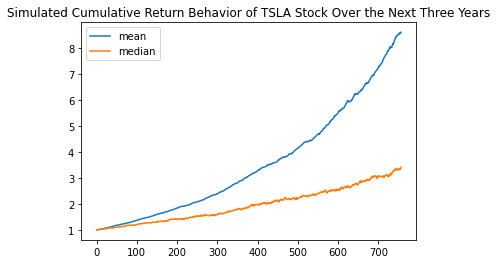

In [7]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of TSLA Stock Over the Next Three Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [8]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10014.415447,10003.819007,7989.628778,11559.607733
2,10053.327597,10034.337370,7596.015584,12431.734716
3,10078.626947,10087.802051,7099.227963,12959.277458
4,10114.803995,10102.570409,7009.970785,14025.803862


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of TSLA Stock Over the Next Year'}>

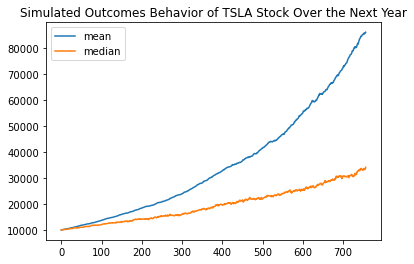

In [9]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of TSLA Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [10]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               8.615181
std               16.142021
min                0.053889
25%                1.357861
50%                3.412224
75%                8.687072
max              170.245137
95% CI Lower       0.247014
95% CI Upper      57.469157
Name: 756, dtype: float64


In [11]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $2470.14 and $574691.57.
